# Exercise 1.1
Load an image and compute the full SVD.
-  A. Choose a rank $r< m$ and comfirm that the matrix $U^*U$ is the $r\times r$ identity matrix.
-  B. Confirm that $UU^*$ is *not* the identity matrix.
-  C. Comptue the norm of the error between $UU^*$ and the $n\times n$ identity matrix as the rank $r$ varies from $1$ to $n$ and plot the error. 

## 📝 Prelimnary Notes

- $U\in\mathbb{R}^{m\times m}$ is an orthonormal matrix and its columns are called the **left singular vectors** of $X$.
    - The first $r$ columns of $U$, $\{\bold{u}_1, \bold{u}_2, \dots, \bold{u}_r\}$ form an orthonormal basis for $\text{Col}(X)$.
    - The remaining $m-r$ columns of $U$, $\{\bold{u}_{r+1}, \bold{u}_{r+2}, \dots, \bold{u}_m\}$ form an orthonormal basis for $\text{Null}(A^T)$.
- $\Sigma\in\mathbb{R}^{m\times n}$ has the structure $$_m \Sigma_n = \begin{bmatrix} _r\tilde{\Sigma}_r & _r \bm{0}_{n-r} \\ _{m-r} \bm{0}_{r} & _{m-r} \bm{0}_{n-r} \end{bmatrix}$$ where $\tilde{\Sigma}$ is a diagonal matrix whose entries are called **singular values** of $X$ and appear in decreasing order (i.e., $\sigma_1 \ge \sigma_2 \ge \dots \ge \sigma_r$). 
- $V\in\mathbb{R}^{n\times n}$ is an orthonormal matrix and its columns are called the **right singular vectors** of $X$.
    - The first $r$ columns of $V$, $\{ \bold{v}_1, \bold{v}_2, \dots, \bold{v}_r \}$ form an orthonormal basis for $\text{Row}(X)$.
    - The remaining $n-r$ columns of $V$, $\{ \bold{v}_{r+1}, \bold{v}_{r+2}, \dots, \bold{v}_n \}$ form an orthonormal basis for $\text{Null}(A)$

## Load an image and compute the full SVD

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import display, Latex, Math

# Load the image
A = imread('/workspaces/steve-brunton-book/images/logo.png')
X = np.mean(A, -1)  # Convert to grayscale

m, n = X.shape
print("Image shape: ", X.shape)

# Take the SVD
U, S, Vh = np.linalg.svd(X, full_matrices=True)
V = Vh.conj().T

Sigma = np.zeros((m, n))
np.fill_diagonal(Sigma, S)

print(f"Image shape:  {X.shape}")
print(f"U shape:      {U.shape}")
print(f"Sigma shape:  {Sigma.shape}")
print(f"V shape:      {V.shape}")

Image shape:  (450, 450)
Image shape:  (450, 450)
U shape:      (450, 450)
Sigma shape:  (450, 450)
V shape:      (450, 450)


## Part A
Choose a rank $r<m$ and confirm that the matrix $U^*U$ is the $r\times r$ identity matrix.

In [ ]:
import random
from IPython.display import display, Latex

#r = random.randint(1, X.shape[0])   # Choose a random rank
r = 10  # Choose a fixed rank
print(f"Rank:        {r}")

# Truncated U (only the first r columns -- i.e., an orthonormal basis for Col(X))
U_r = U[:, :r]
print(f"U_r shape:   {U_r.shape}")

# Compute U_r^* * U_r
I_r_approx = np.dot(U_r.conj().T, U_r)
print(f"I_r_approx shape:   {I_r_approx.shape}")

# Check the difference from the idenity
error_I_r_approx = np.linalg.norm(I_r_approx - np.eye(r))
print(f"Error from identity: {error_I_r_approx}")

# Check if error is close enough to zero
if error_I_r_approx < 1e-6:
    display(Latex(r"✅ $U_r^* U_r$ is close to the identity matrix."))
else:
    display(Latex(r"❌ $U_r^* U_r$ is NOT close to the identity matrix."))

Rank:        10
U_r shape:   (450, 10)
I_r_approx shape:   (10, 10)
Error from identity: 3.645655051102724e-07


<IPython.core.display.Latex object>

## Part B
Confirm that $UU^*$ is *not* an approximation of the identity matrix.

P shape:      (450, 450)
Error from identity: 20.976176964285425


<IPython.core.display.Latex object>

Text(0.5, 1.0, 'Absolute difference between $P=UU^*$ and $I_m$')

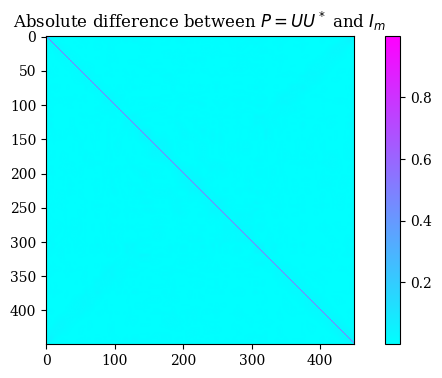

In [ ]:
# Compute the projection matrix
P = np.dot(U_r, U_r.conj().T)
print(f"P shape:      {P.shape}")

# Compare P to the mxm identity matrix
error_P = np.linalg.norm(P - np.eye(m))
print(f"Error from identity: {error_P}")

# Check if error is close enough to zero
if error_P < 1e-6:
    display(Latex(r"✅ $P$ is close to the identity matrix."))
else:
    display(Latex(r"❌ $P$ is NOT close to the identity matrix."))

plt.figure(figsize=(8, 4))
plt.imshow(np.abs(P - np.eye(m)), cmap='cool')

plt.colorbar()
plt.title(r"Absolute difference between $P=UU^*$ and $I_m$")

### Visualization Results
